# **AMAZON PRODUCT DATA ANALYSIS**

**MOTIVATION**
> The entry of Chinese ultra-low-cost business models such as Temu and SHEIN has intensified competition in the e-commerce market. Notably, Temu's Monthly Active Users (MAU) in the U.S. exceeded 50 million in January, while Amazon recorded 67 million MAU during the same period. Considering that Temu only started its U.S. operations in September 2022, this rapid growth is remarkable. Additionally, Temu ranked first in app downloads in October 2023, underscoring the need for Amazon to be cautious of the Chinese ultra-low-cost business model in the e-commerce market.

**OBJECTIVE**
> In this context, the goal is to analyze how Amazon can retain existing users and attract new ones to maintain its market share by examining sales data.

**HYPOTHESIS**
> Should Amazon attract ultra-low-cost products to compete against Chinese ultra-low-cost businesses?

**TABLE OF CONTENTS**
1. SET UP & IMPORT DATA
2. PREPROCESSING DATA
3. NUMERICAL DATA VISUALIZATION
4. TEXT DATA VISUALIZATION
5. INSIGHTS
6. CONCLUSION
7. LIMITATION
8. REFERENCES

# 1. SET UP & IMPORT DATA

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


In [2]:
#import data
amazon = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")
amazon.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [3]:
#data info
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
#check statistical info
amazon.describe(include="all")

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B07JW9H4J1,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [5]:
amazon.nunique()

product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64

* All vlaues have data type of object
* Some of columns have values of text
* Most of columns have few of unique values
* Need to delete some columns which look like unneccesary

# 2. PREPROCESSING DATA

In [6]:
#drop unneccesary columns
amazon = amazon.drop(['product_id','user_id','user_name','review_id','img_link','product_link'], axis=1)
amazon.columns

Index(['product_name', 'category', 'discounted_price', 'actual_price',
       'discount_percentage', 'rating', 'rating_count', 'about_product',
       'review_title', 'review_content'],
      dtype='object')

#### Price

In [7]:
# Remove the ₹(Rupee symbol), ,(comma)
amazon['discounted_price'] = amazon['discounted_price'].str.replace('₹','').str.replace(',','')
amazon['actual_price'] = amazon['actual_price'].str.replace('₹','').str.replace(',','')

amazon[['discounted_price', 'actual_price']]

,discounted_price,actual_price
0,399,1099
1,199,349
2,199,1899
3,329,699
4,154,399
...,...,...
1460,379,919
1461,2280,3045
1462,2219,3080
1463,1399,1890


In [8]:
#Change the data type to float
amazon['discounted_price']=amazon['discounted_price'].astype(float)
amazon['actual_price']=amazon['actual_price'].astype(float)

amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   object 
 5   rating               1465 non-null   object 
 6   rating_count         1463 non-null   object 
 7   about_product        1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
dtypes: float64(2), object(8)
memory usage: 114.6+ KB


In [9]:
#Change the currency to USD
# ₹1 = $0.01
USD = 0.01
amazon['discounted_price'] = amazon['discounted_price'].multiply(USD)
amazon['actual_price']=amazon['actual_price'].multiply(USD)

amazon[['discounted_price', 'actual_price']]

,discounted_price,actual_price
0,3.99,10.99
1,1.99,3.49
2,1.99,18.99
3,3.29,6.99
4,1.54,3.99
...,...,...
1460,3.79,9.19
1461,22.80,30.45
1462,22.19,30.80
1463,13.99,18.90


In [10]:
#'discount_precentage' columns
amazon['discount_percentage'] = amazon['discount_percentage'].str.replace('%','')
amazon['discount_percentage'] = amazon['discount_percentage'].astype(float)

amazon['discount_percentage']

0       64.0
1       43.0
2       90.0
3       53.0
4       61.0
        ... 
1460    59.0
1461    25.0
1462    28.0
1463    26.0
1464    22.0
Name: discount_percentage, Length: 1465, dtype: float64

#### Rating

In [11]:
#remove special characters and change to float type
amazon['rating'] = amazon['rating'].replace('|', np.nan)
amazon['rating'] = amazon['rating'].astype(float)

amazon['rating_count'] = amazon['rating_count'].str.replace(',', '')
amazon['rating_count'] = amazon['rating_count'].astype(float)

In [12]:
#check
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   category             1465 non-null   object 
 2   discounted_price     1465 non-null   float64
 3   actual_price         1465 non-null   float64
 4   discount_percentage  1465 non-null   float64
 5   rating               1464 non-null   float64
 6   rating_count         1463 non-null   float64
 7   about_product        1465 non-null   object 
 8   review_title         1465 non-null   object 
 9   review_content       1465 non-null   object 
dtypes: float64(5), object(5)
memory usage: 114.6+ KB


In [13]:
#round off
amazon['rating'] = amazon['rating'].round(0)
amazon['rating'].unique()

array([ 4.,  3.,  5.,  2., nan])

In [14]:
# let's fill the nan values with 0
amazon['rating'].fillna(0, inplace=True)
amazon['rating'].unique()

/tmp/ipykernel_18/1427182580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon['rating'].fillna(0, inplace=True)


array([4., 3., 5., 2., 0.])

#### Category

Divide Category into 'main_Category' and 'detail_Category', following the first one is the main and the last one is the detail. I'm gonna ignore the others.

In [15]:
#Divide Category into Main and Detail
Main = amazon['category'].str.split('|').str.get(0)
Detail = amazon['category'].str.split('|').str.get(-1)

amazon['main_category'], amazon['detail_category'] = (Main, Detail)
amazon.drop(['category'], axis=1, inplace=True)
amazon.head()


,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category,detail_category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,3.99,10.99,64.0,4.0,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,USBCables
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,1.99,3.49,43.0,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,USBCables
2,Sounce Fast Phone Charging Cable & Data Sync U...,1.99,18.99,90.0,4.0,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,USBCables
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,3.29,6.99,53.0,4.0,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,USBCables
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,1.54,3.99,61.0,4.0,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,USBCables


In [16]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   float64
 4   rating               1465 non-null   float64
 5   rating_count         1463 non-null   float64
 6   about_product        1465 non-null   object 
 7   review_title         1465 non-null   object 
 8   review_content       1465 non-null   object 
 9   main_category        1465 non-null   object 
 10  detail_category      1465 non-null   object 
dtypes: float64(5), object(6)
memory usage: 126.0+ KB


#### Review(Text Data)

In [17]:
#for text by product description
text_prod = amazon[['main_category', 'about_product']]
#for text by category
text_cate = amazon[['main_category', 'review_title', 'review_content']]
#for text by rate
text_rate = amazon[['rating', 'review_title', 'review_content']]

In [18]:
#lower all text
text_prod["about_product"] = text_prod["about_product"].str.lower()
text_cate["review_title"] = text_cate["review_title"].str.lower()
text_cate["review_content"] = text_cate["review_content"].str.lower()
text_rate["review_title"] = text_rate["review_title"].str.lower()
text_rate["review_content"] = text_rate["review_content"].str.lower()

/tmp/ipykernel_18/1211914209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod["about_product"] = text_prod["about_product"].str.lower()
/tmp/ipykernel_18/1211914209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].str.lower()
/tmp/ipykernel_18/1211914209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [19]:
#remove special characters
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [20]:
text_prod['about_product'] = text_prod['about_product'].apply(remove_punctuations)
text_cate["review_title"] = text_cate["review_title"].apply(remove_punctuations)
text_cate["review_content"] = text_cate["review_content"].apply(remove_punctuations)
text_rate["review_title"] = text_rate["review_title"].apply(remove_punctuations)
text_rate["review_content"] = text_rate["review_content"].apply(remove_punctuations)

/tmp/ipykernel_18/1944245735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod['about_product'] = text_prod['about_product'].apply(remove_punctuations)
/tmp/ipykernel_18/1944245735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].apply(remove_punctuations)
/tmp/ipykernel_18/1944245735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [21]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    stop_words = stopwords.words('english')
    fresh_text = []
    for i in text.lower().split():
        if i not in stop_words:
            fresh_text.append(i)
    return(' '.join(fresh_text))


In [22]:
text_prod['about_product'] = text_prod['about_product'].apply(remove_stopwords)
text_cate["review_title"] = text_cate["review_title"].apply(remove_stopwords)
text_cate["review_content"] = text_cate["review_content"].apply(remove_stopwords)
text_rate["review_title"] = text_rate["review_title"].apply(remove_stopwords)
text_rate["review_content"] = text_rate["review_content"].apply(remove_stopwords)

/tmp/ipykernel_18/418102407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod['about_product'] = text_prod['about_product'].apply(remove_stopwords)
/tmp/ipykernel_18/418102407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate["review_title"] = text_cate["review_title"].apply(remove_stopwords)
/tmp/ipykernel_18/418102407.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

It seems like we've done to clean and prepare data! Let's move on to visualizations and do more preprocessing data for each viz.

# 3. VISUALIZATION

#### Category distribution

<Axes: title={'center': 'Distribution of Main Categories on Amazon'}, xlabel='main_category'>

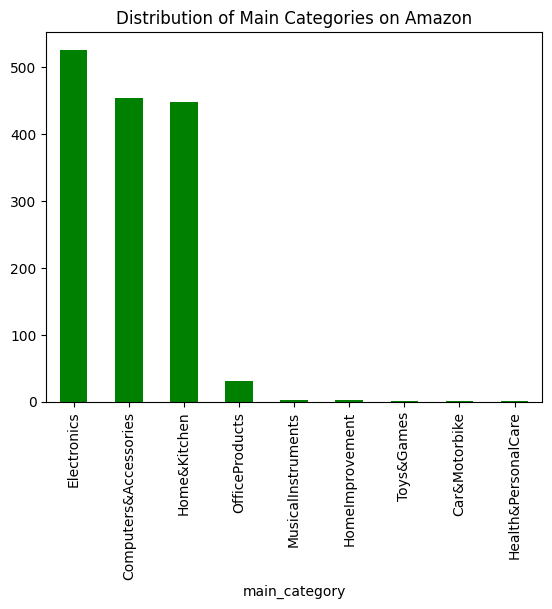

In [23]:
#Let's make the smiple bar graph to know how many are ther on each main cateogories
amazon.main_category.value_counts().plot(kind='bar', title="Distribution of Main Categories on Amazon", color='green')

> It would be better to focus on **'Electronics,' 'Computers & Accessories,'** and **'Home & Kitchen'** more than the other categories based on the bar chart above.

In [24]:
#check detail category in each main category
category_df = amazon[['main_category', 'detail_category']]
category_df

,main_category,detail_category
0,Computers&Accessories,USBCables
1,Computers&Accessories,USBCables
2,Computers&Accessories,USBCables
3,Computers&Accessories,USBCables
4,Computers&Accessories,USBCables
...,...,...
1460,Home&Kitchen,WaterPurifierAccessories
1461,Home&Kitchen,Rice&PastaCookers
1462,Home&Kitchen,HeatConvectors
1463,Home&Kitchen,ExhaustFans


In [25]:
#how many detail category has value respectively?
amazon['detail_category'].value_counts()

detail_category
USBCables             233
SmartWatches           76
Smartphones            68
SmartTelevisions       63
In-Ear                 52
                     ... 
InternalHardDrives      1
WoodenPencils           1
BatteryChargers         1
DataCards&Dongles       1
HandheldBags            1
Name: count, Length: 207, dtype: int64

In [26]:
#How many detail categories are distributed in each main category?
category_df.groupby(['main_category'])['detail_category'].count()

main_category
Car&Motorbike              1
Computers&Accessories    453
Electronics              526
Health&PersonalCare        1
Home&Kitchen             448
HomeImprovement            2
MusicalInstruments         2
OfficeProducts            31
Toys&Games                 1
Name: detail_category, dtype: int64

In [27]:
#for making chart, let's use crosstab method
category_c = pd.crosstab(index=category_df['main_category'], columns=category_df['detail_category'])
category_c

detail_category,3DGlasses,AVReceivers&Amplifiers,Adapters,Adapters&Multi-Outlets,AirFryers,AirPurifiers&Ionizers,AutomobileChargers,BackgroundSupports,Basic,BasicCases,...,WaterCartridges,WaterFilters&Purifiers,WaterPurifierAccessories,Webcams,Wet-DryVacuums,WetGrinders,WireboundNotebooks,WirelessUSBAdapters,WoodenPencils,YogurtMakers
main_category,,,,,,,,,,,,,,,,,,,,,
Car&Motorbike,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Computers&Accessories,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,18,0,0
Electronics,1,1,3,0,0,0,5,1,0,4,...,0,0,0,0,0,0,0,0,0,0
Health&PersonalCare,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Home&Kitchen,0,0,0,0,5,0,0,0,0,0,...,3,12,11,0,6,2,0,0,1,1
HomeImprovement,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MusicalInstruments,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
OfficeProducts,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,4,0,0,0
Toys&Games,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Distribution of Subcategories within Each Main Category')

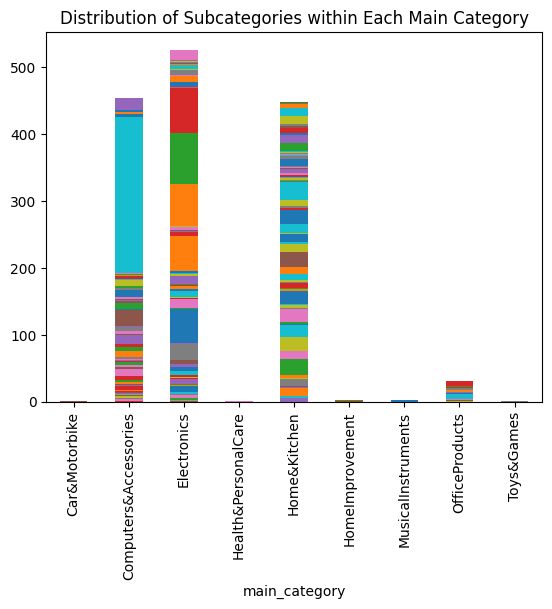

In [28]:
#Visualize stacked bar chart
import matplotlib.pyplot as plt

category_c.plot.bar(stacked=True)
plt.legend('', frameon=False)
plt.title("Distribution of Subcategories within Each Main Category")

#### Price distritbution

In [29]:
#let's see the general inforamtion.
amazon[['actual_price', 'discounted_price','discount_percentage']].describe()

,actual_price,discounted_price,discount_percentage
count,1465.000000,1465.000000,1465.000000
mean,54.449906,31.253109,47.691468
std,108.748269,69.443044,21.635905
min,0.390000,0.390000,0.000000
25%,8.000000,3.250000,32.000000
50%,16.500000,7.990000,50.000000
75%,42.950000,19.990000,63.000000
max,1399.000000,779.900000,94.000000


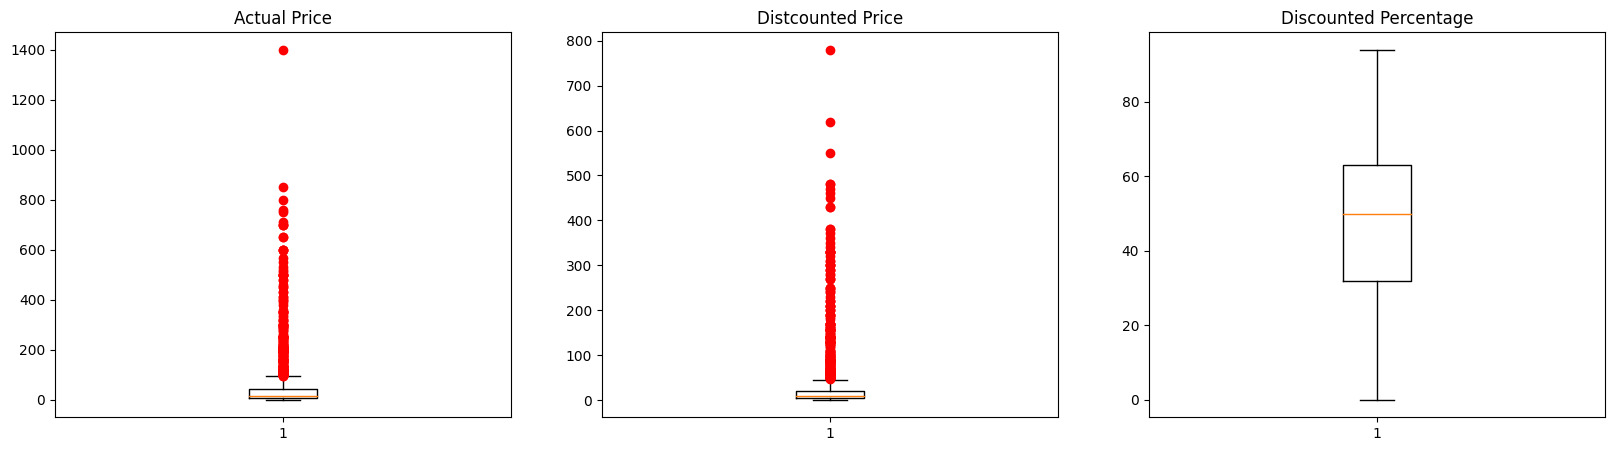

In [30]:
#Let's look at the price as box plot
fig, ax = plt.subplots(1,3, figsize=(20, 5))

ax[0].boxplot(amazon.actual_price, 0, 'ro')
ax[1].boxplot(amazon.discounted_price, 0, 'ro')
ax[2].boxplot(amazon.discount_percentage, 0, 'ro')

ax[0].set_title('Actual Price')
ax[1].set_title('Distcounted Price')
ax[2].set_title('Discounted Percentage')

plt.show()


> We can find many outliers in 'Actual Price' and 'Discounted Price' due to the various types of categories. This means that there are significant differences in price levels depending on the category.

#### Price info in each Category

In [31]:
m_category = amazon['main_category'].unique()
m_category

array(['Computers&Accessories', 'Electronics', 'MusicalInstruments',
       'OfficeProducts', 'Home&Kitchen', 'HomeImprovement', 'Toys&Games',
       'Car&Motorbike', 'Health&PersonalCare'], dtype=object)

We have total 9 main categories

In [32]:
#Let's see what's the price like in each main category
Main_Category_price = amazon[['main_category','actual_price','discounted_price']]
Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
Main_Category_price


/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <function mean at 0x78e2a15f7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Main_Category_price = Main_Category_price.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2558766395.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" i

actual_price                      discounted_price  \
                               min        mean      max              min   
main_category                                                              
Car&Motorbike                40.00   40.000000    40.00            23.39   
Computers&Accessories         0.39   16.836231   598.90             0.39   
Electronics                   1.71  101.273118  1399.00             0.79   
Health&PersonalCare          19.00   19.000000    19.00             8.99   
Home&Kitchen                  0.79   41.620737   759.90             0.79   
HomeImprovement               5.99    7.990000     9.99             2.49   
MusicalInstruments            6.99   13.470000    19.95             4.78   
OfficeProducts                0.50    3.971935    29.99             0.50   
Toys&Games                    1.50    1.500000     1.50             1.50   

                                          
                            mean     max  
main_category                             
Car&Motorbike          23.390000   23.39  
Computers&Accessories   8.426504  372.47  
Electronics            59.658878  779.90  
Health&PersonalCare     8.990000    8.99  
Home&Kitchen           23.306156  429.90  
HomeImprovement         3.370000    4.25  
MusicalInstruments      6.380000    7.98  
OfficeProducts          3.015806   13.99  
Toys&Games              1.500000    1.50

/tmp/ipykernel_18/1422676193.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bar = sns.catplot(Main_Category_price.stack([0, 1])


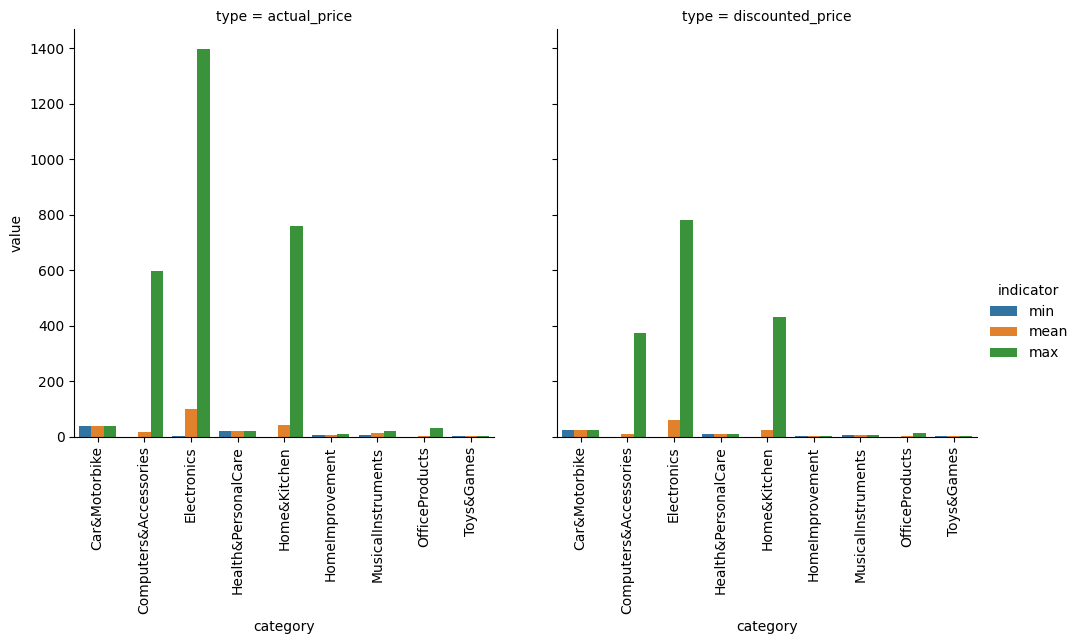

In [33]:
#Let's look at this info as bar chart
import seaborn as sns

bar = sns.catplot(Main_Category_price.stack([0, 1])
              .rename_axis(['category', 'type', 'indicator'])
              .reset_index(name='value'),
            x='category', y='value', col='type', hue='indicator',
            kind='bar')

bar.set_xticklabels(rotation=90) 

> We can see a significant difference in the maximum price depending on the main category, while the minimum and mean prices are unremarkable.

#### Discount Percentage in each category

/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <function mean at 0x78e2a15f7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])
/tmp/ipykernel_18/2345914155.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.


<Axes: xlabel='main_category'>

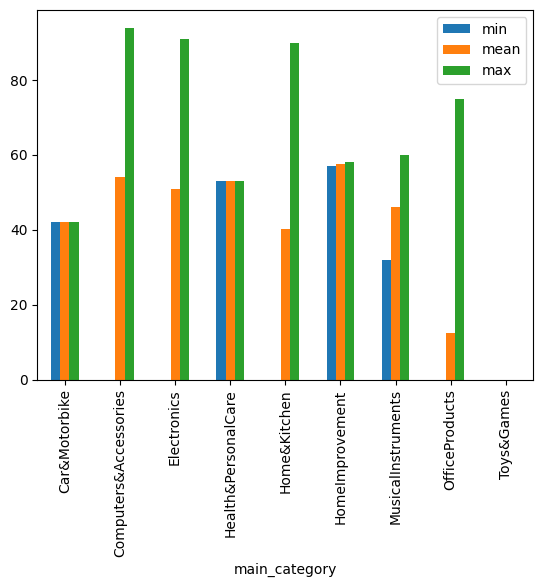

In [34]:
#What about the discount percentage?
Main_Category_dis = amazon[['main_category','discount_percentage']]
Main_Category_dis = Main_Category_dis.groupby('main_category').aggregate([min,np.mean, max])


Main_Category_dis.plot(kind='bar', y='discount_percentage', stacked=False)


#### What are the most expensive and cheapest products?

In [35]:
# Then what's the products which are max and min in price


price_info = amazon.loc[
    [amazon['actual_price'].idxmax(), amazon['actual_price'].idxmin(), amazon['discounted_price'].idxmax(), amazon['discounted_price'].idxmin()]
]
price_info


,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category,detail_category
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,779.90,1399.00,44.0,5.0,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,Product installation was excellent but delive...,The delivery people were not careful with the ...,Electronics,SmartTelevisions
975,E-COSMOS 5V 1.2W Portable Flexible USB LED Lig...,0.39,0.39,0.0,4.0,3344.0,The side the LED light falls on will depend on...,"Lighting,TINY & USEFUL.,Fair product,Worth for...","Recieved a wrong color.. But ok..,Simple and Q...",Computers&Accessories,Lamps
249,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,779.90,1399.00,44.0,5.0,5935.0,Resolution: 4K Ultra HD (3840 x 2160) | Refres...,Product installation was excellent but delive...,The delivery people were not careful with the ...,Electronics,SmartTelevisions
645,GIZGA essentials Universal Silicone Keyboard P...,0.39,2.99,87.0,4.0,15233.0,Universal Silicone Keyboard Protector Keyguard...,"Good,Affordable and best,Check the size !,valu...","Value for money,Grt product,Please ensure the ...",Computers&Accessories,DustCovers


#### Price distribution by rating score

In [36]:
amazon['rating'].describe()

count    1465.000000
mean        3.987031
std         0.251707
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: rating, dtype: float64

Most rating is positive.

<Axes: title={'center': 'The Number of Ratings'}, xlabel='rating'>

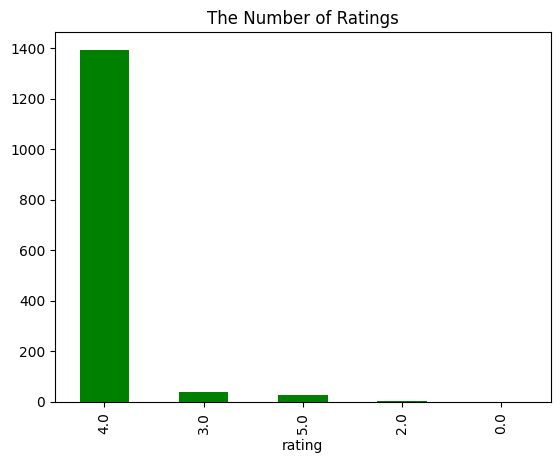

In [37]:
# how many are there in each rating?
amazon.rating.value_counts().plot(kind='bar', title='The Number of Ratings', color='green')

> A rating of 4.0 is the most frequent, indicating that most ratings are positive.

In [38]:
#what about the price in each rating?
rating_price = amazon[['rating','actual_price','discounted_price']]
rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
rating_price


/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <function mean at 0x78e2a15f7d90> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  rating_price = rating_price.groupby('rating').aggregate([min,np.mean, max])
/tmp/ipykernel_18/322312239.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  rating_price = rating_price.groupby

actual_price                     discounted_price                   
                min       mean      max              min       mean     max
rating                                                                     
0.0           24.99  24.990000    24.99            20.99  20.990000   20.99
2.0           14.99  19.970000    24.95             6.69   9.840000   12.99
3.0            3.00  23.215250   191.25             1.15   8.835750   72.99
4.0            0.39  54.501373   850.00             0.39  31.522164  619.99
5.0            2.99  98.453793  1399.00             1.60  51.080345  779.90

/tmp/ipykernel_18/2089487875.py:2: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  bar_r = sns.catplot(rating_price.stack([0, 1])


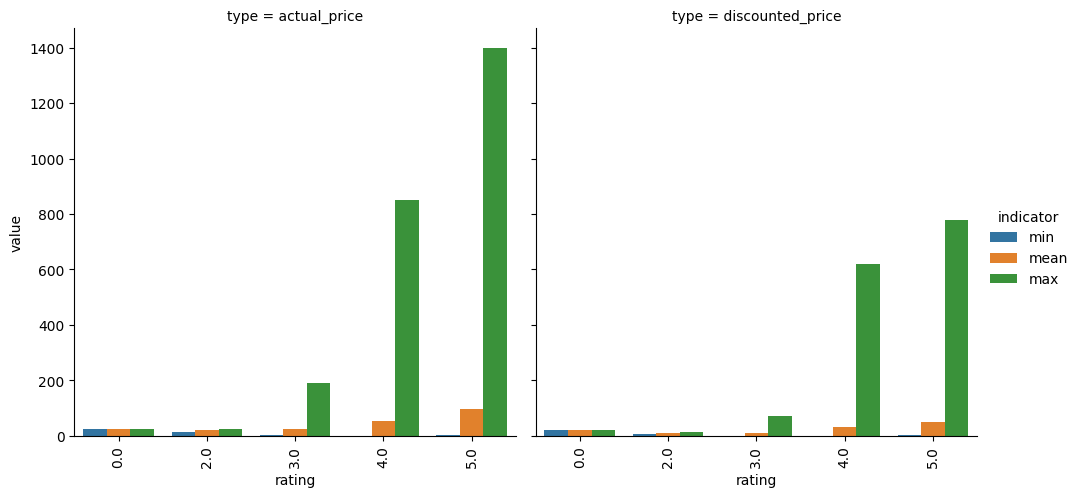

In [39]:
#Let's look this as bar chart
bar_r = sns.catplot(rating_price.stack([0, 1])
              .rename_axis(['rating', 'type', 'indicator'])
              .reset_index(name='value'),
            x='rating', y='value', col='type', hue='indicator',
            kind='bar')

bar_r.set_xticklabels(rotation=90) 

> It is clear that there is a positive correlation between price and rating. Ratings tend to be higher as the average price increases, with the exception of the negative ratings (0 and 2).

#### Distribution of Rating Scores by Category

In [40]:
rating_cate = pd.crosstab(index=amazon['main_category'], columns=amazon['rating'])
rating_cate

rating,0.0,2.0,3.0,4.0,5.0
main_category,,,,,
Car&Motorbike,0,0,0,1,0
Computers&Accessories,0,0,8,437,8
Electronics,0,0,14,505,7
Health&PersonalCare,0,0,0,1,0
Home&Kitchen,1,2,18,413,14
HomeImprovement,0,0,0,2,0
MusicalInstruments,0,0,0,2,0
OfficeProducts,0,0,0,31,0
Toys&Games,0,0,0,1,0


> Referring to the table above, we can see:
> - It is clear that most products have positive ratings.
> - Only Home & Kitchen has all rating scores represented.

# 4. TEXT DATA VISUALIZATION

#### Product Descriptions

In [41]:
text_prod.head()

,main_category,about_product
0,Computers&Accessories,high compatibility compatible iphone 12 11 xxs...
1,Computers&Accessories,compatible type c enabled devices android smar...
2,Computers&Accessories,【 fast charger data sync】with builtin safety p...
3,Computers&Accessories,boat deuce usb 300 2 1 cable compatible smartp...
4,Computers&Accessories,charge sync function cable comes charging data...


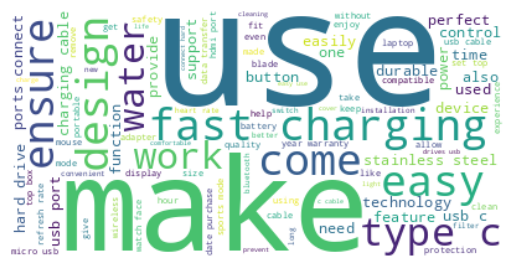

In [42]:
#Let's make word cloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_prod.about_product)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
# Which words are appeared?
prod_word = text_prod.about_product.str.split(expand=True).stack().value_counts().to_frame('frequency')
prod_word.head(20)

,frequency
usb,1006
cable,830
1,648
charging,606
warranty,495
power,494
design,464
devices,463
use,457
easy,427


Need to remove digits

In [44]:
#Let's remove the digits and see the top 10 words
text_prod.about_product.replace('\d+', '', regex=True, inplace=True)
text_prod.about_product.str.split(expand=True).stack().value_counts()

word_t10 = text_prod.about_product.str.split(expand=True).stack().value_counts().iloc[:10].to_frame('frequency')
word_t10 = word_t10.reset_index()
word_t10.rename(columns={'index': 'word'}, inplace=True)
word_t10['percentage'] = round(word_t10.frequency / prod_word.frequency.sum(),2) *100
word_t10.head()

/tmp/ipykernel_18/3979804572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_prod.about_product.replace('\d+', '', regex=True, inplace=True)


,word,frequency,percentage
0,usb,1007,1.0
1,cable,832,1.0
2,charging,608,1.0
3,warranty,500,0.0
4,power,496,0.0


Text(0.5, 1.0, 'Top 10 Words used for description of products')

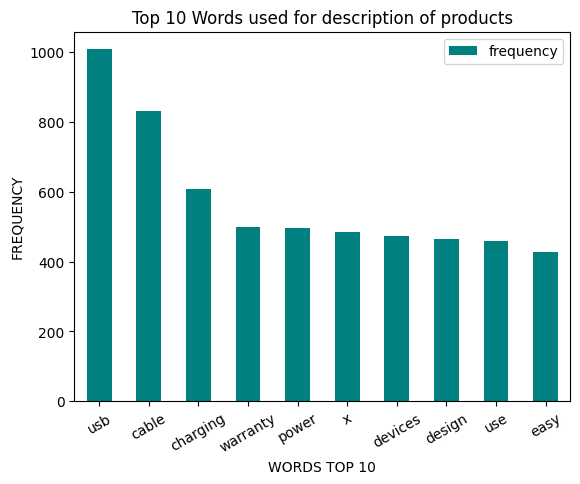

In [45]:
#Bar chart
word_t10.plot.bar(x='word',y='frequency', rot=30, xlabel="WORDS TOP 10", ylabel="FREQUENCY", color="teal", grid=False)
plt.title("Top 10 Words used for description of products")

> It is not surprising that 'USD' is the most mentioned word, as it refers to the best-selling item in the detailed category. Besides product-related terms such as 'USB' and 'cable,' sellers also use words related to functions like 'charging' and 'power.' Additionally, we observe terms that suggest a guarantee of the product, such as 'warranty,' as well as words indicating ease of use, such as 'easy.'

#### Consumer Review

##### Review Titles

In [46]:
text_cate.head()

,main_category,review_title,review_content
0,Computers&Accessories,satisfiedcharging really fastvalue moneyproduc...,looks durable charging fine toono complainscha...
1,Computers&Accessories,good braided cable type c devicegood quality p...,ordered cable connect phone android auto car c...
2,Computers&Accessories,good speed earlier versionsgood productworking...,quite durable sturdyhttpsmmediaamazoncomimages...
3,Computers&Accessories,good productgood onenicereally nice productver...,good productlong wirecharges goodnicei bought ...
4,Computers&Accessories,good originaldecentgood one secondary usebest ...,bought instead original apple work 150rs fast ...


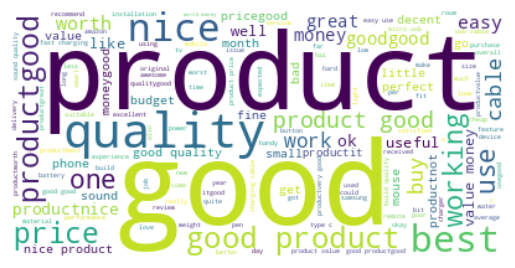

In [47]:
#Let's make wordcloud on review title

from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_cate.review_title)
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
#wondering how many times the words are mentioned

title_word = text_cate.review_title.str.split(expand=True).stack().value_counts().to_frame('frequency')
title_word.head(20)

,frequency
good,1136
product,957
quality,394
productgood,253
price,244
nice,206
money,190
cable,171
value,165
best,156


In [49]:
#let's extract the top20 words
title_t20 = text_cate.review_title.str.split(expand=True).stack().value_counts().iloc[:20].to_frame('frequency')
title_t20 = title_t20.reset_index()
title_t20.rename(columns={'index': 'word'}, inplace=True)
title_t20['percentage'] = round(title_t20.frequency / title_word.frequency.sum(),2) *100
title_t20.head()

,word,frequency,percentage
0,good,1136,4.0
1,product,957,4.0
2,quality,394,2.0
3,productgood,253,1.0
4,price,244,1.0


Text(0.5, 1.0, 'Top 20 Words used for review title')

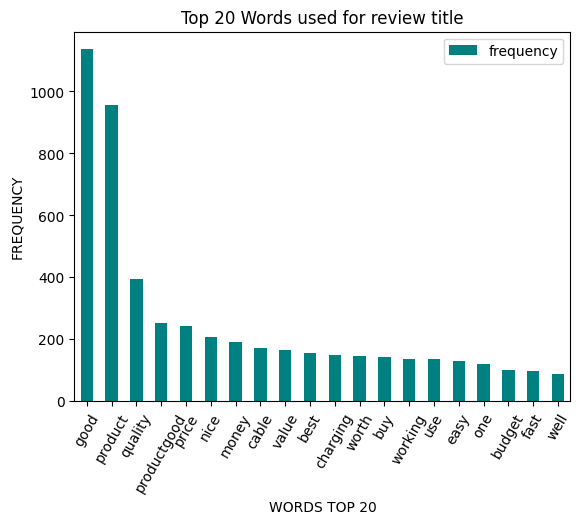

In [50]:
#Bar chart
title_t20.plot.bar(x='word',y='frequency', rot=60, xlabel="WORDS TOP 20", ylabel="FREQUENCY", color="teal", grid=False)
plt.title("Top 20 Words used for review title")

##### Review content

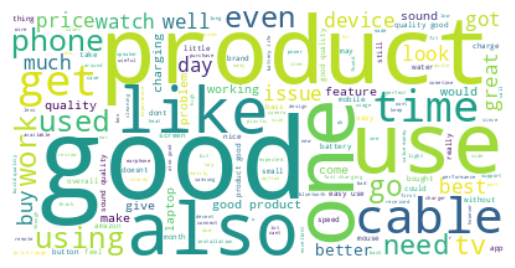

In [51]:
#Word Cloud

from wordcloud import WordCloud
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
description = " ".join(review for review in text_cate.review_content)

wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(description)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Top 20 Words in the review content')

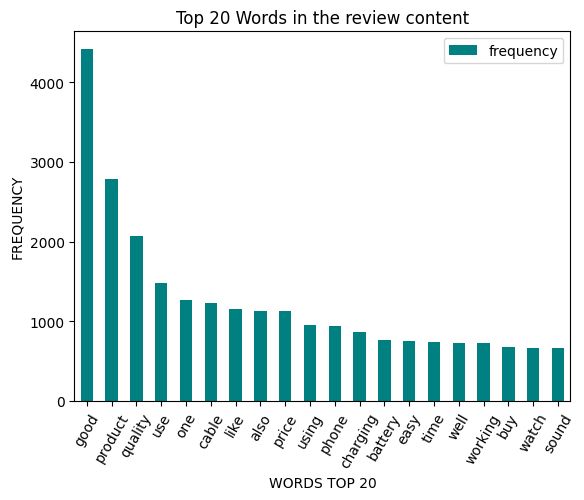

In [52]:
#Let's see the top20 words in review content in bar chart

#top 20
review_t20 = text_cate.review_content.str.split(expand=True).stack().value_counts().iloc[:20].to_frame('frequency')
review_t20 = review_t20.reset_index()
review_t20.rename(columns={'index': 'word'}, inplace=True)
#review_t20.head()

#bar graph
review_t20.plot.bar(x='word',y='frequency', rot=60, xlabel="WORDS TOP 20", ylabel="FREQUENCY", color="teal", grid=False)
plt.title("Top 20 Words in the review content")

##### Review Content by Category

In [53]:
#Create list
text_cate['words'] = text_cate.review_content.str.lower().str.split(' ')

#Explode and count
cate_rv=text_cate.explode('words').groupby('main_category')['words'].value_counts()
cate_rv = cate_rv.to_frame()
cate_rv = cate_rv.reset_index()

/tmp/ipykernel_18/2125700067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cate['words'] = text_cate.review_content.str.lower().str.split(' ')


In [54]:
amazon.main_category.value_counts()

main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

> Only three categories have notably high quantities of review content. Let's select these three for analysis.

In [55]:
Electronics = cate_rv.loc[cate_rv['main_category'] == "Electronics"]
Com_Acc = cate_rv.loc[cate_rv['main_category'] == "Computers&Accessories"]
Home_Kit = cate_rv.loc[cate_rv['main_category'] == "Home&Kitchen"]

Electronics.head()

,main_category,words,count
9141,Electronics,good,2136
9142,Electronics,quality,1212
9143,Electronics,product,820
9144,Electronics,phone,791
9145,Electronics,watch,651


In [56]:
#Top 10 words in each category
Elect_t10 = Electronics.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
Com_Acc_t10 = Com_Acc.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
Home_Kit_t10 = Home_Kit.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]

Elect_t10

,main_category,words,count
9141,Electronics,good,2136
9142,Electronics,quality,1212
9143,Electronics,product,820
9144,Electronics,phone,791
9145,Electronics,watch,651
9146,Electronics,price,616
9147,Electronics,tv,612
9148,Electronics,battery,591
9149,Electronics,sound,553
9150,Electronics,like,551


Text(0.5, 0.98, 'Top 10 Words in Review Content by Category')

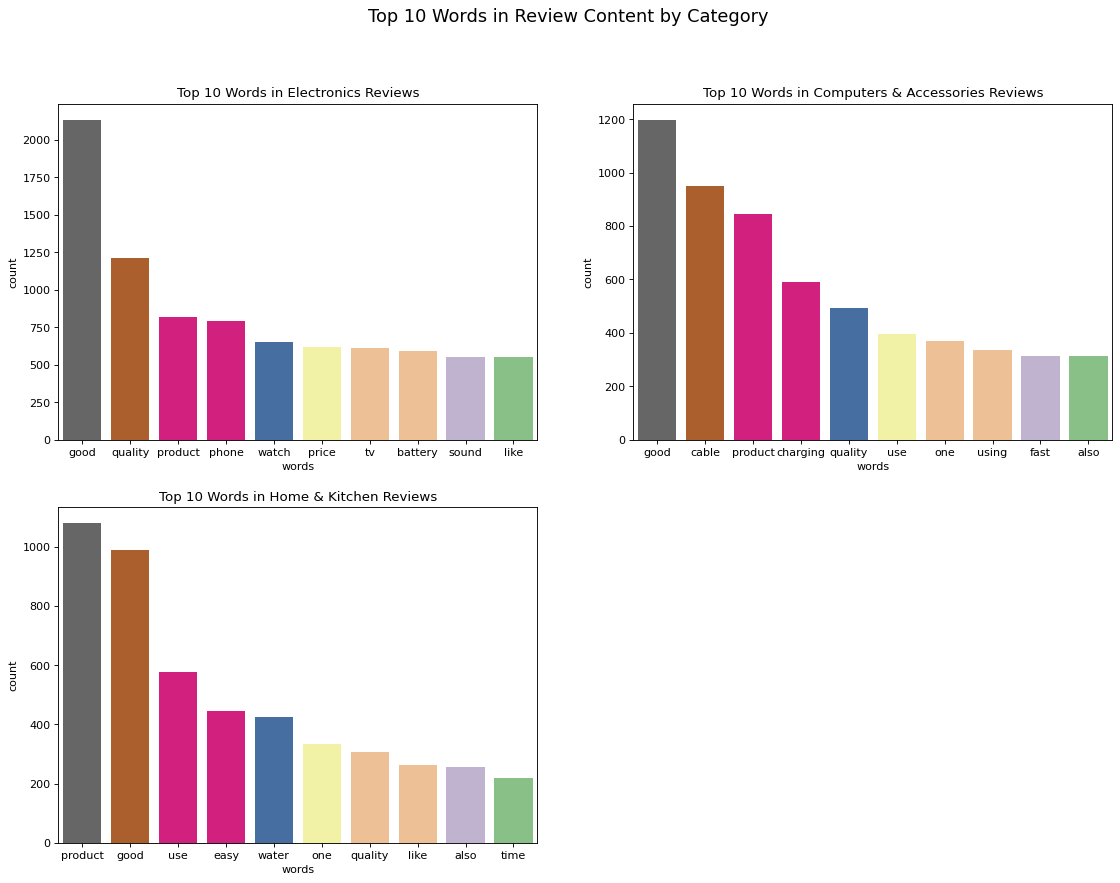

In [57]:
#Let's look at the words in bar chart

fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='words', y='count', data=Elect_t10, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Top 10 Words in Electronics Reviews')

sns.barplot(x='words', y='count', data=Com_Acc_t10, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Top 10 Words in Computers & Accessories Reviews')

sns.barplot(x='words', y='count', data=Home_Kit_t10, ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Top 10 Words in Home & Kitchen Reviews')

fig.delaxes(axarr[1][1])

fig.suptitle('Top 10 Words in Review Content by Category', fontsize=16)

##### Review Content by Rating Score

In [58]:
text_rate.head()

,rating,review_title,review_content
0,4.0,satisfiedcharging really fastvalue moneyproduc...,looks durable charging fine toono complainscha...
1,4.0,good braided cable type c devicegood quality p...,ordered cable connect phone android auto car c...
2,4.0,good speed earlier versionsgood productworking...,quite durable sturdyhttpsmmediaamazoncomimages...
3,4.0,good productgood onenicereally nice productver...,good productlong wirecharges goodnicei bought ...
4,4.0,good originaldecentgood one secondary usebest ...,bought instead original apple work 150rs fast ...


In [59]:
#Create list

text_rate['words'] = text_rate.review_content.str.lower().str.split(' ')

#Explode and count

rate_rv=text_rate.explode('words').groupby('rating')['words'].value_counts()
rate_rv = rate_rv.to_frame()
rate_rv = rate_rv.reset_index()

/tmp/ipykernel_18/2970173672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_rate['words'] = text_rate.review_content.str.lower().str.split(' ')


In [60]:
# As the the score 2 of rating has only 2 reviews, I won't make the graph for it
rate_3 = rate_rv.loc[rate_rv['rating'] == 3]
rate_4 = rate_rv.loc[rate_rv['rating'] == 4]
rate_5 = rate_rv.loc[rate_rv['rating'] == 5]

rate_3.head()

,rating,words,count
204,3.0,product,64
205,3.0,good,59
206,3.0,quality,41
207,3.0,one,36
208,3.0,remote,35


In [61]:
#Top10 words in each rating
r3_t10 = rate_3.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
r4_t10 = rate_4.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]
r5_t10 = rate_5.sort_values(['count', 'words'], ascending=[False, True]).iloc[:10]

r3_t10

,rating,words,count
204,3.0,product,64
205,3.0,good,59
206,3.0,quality,41
207,3.0,one,36
208,3.0,remote,35
209,3.0,use,29
210,3.0,working,26
211,3.0,bluetooth,24
212,3.0,price,19
213,3.0,also,17


Text(0.5, 0.98, 'Top 10 Words in Review Content by Rating Score')

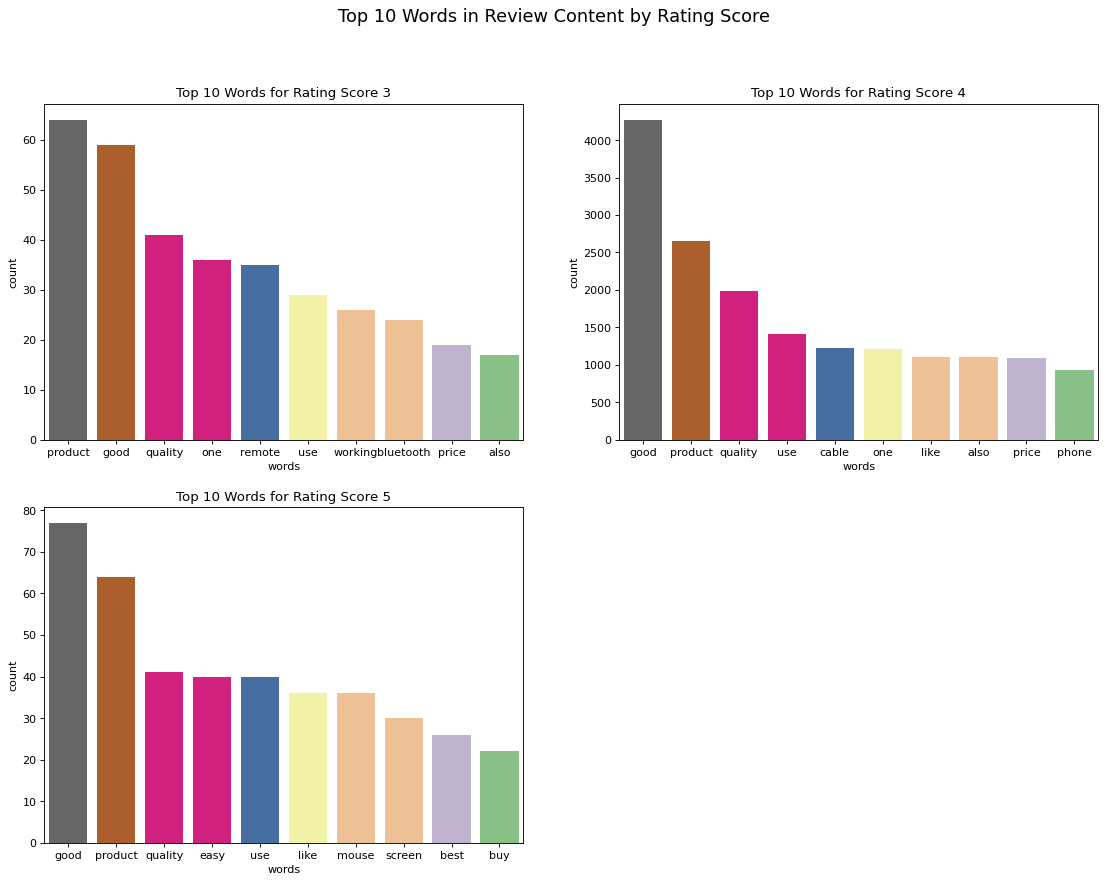

In [62]:
#Let's make bar chart

fig, axarr = plt.subplots(2, 2, figsize=(17,12), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='words', y='count', data=r3_t10, ax=axarr[0][0], palette="Accent_r")
axarr[0][0].set_title('Top 10 Words for Rating Score 3')

sns.barplot(x='words', y='count', data=r4_t10, ax=axarr[0][1], palette="Accent_r")
axarr[0][1].set_title('Top 10 Words for Rating Score 4')

sns.barplot(x='words', y='count', data=r5_t10, ax=axarr[1][0], palette="Accent_r")
axarr[1][0].set_title('Top 10 Words for Rating Score 5')

fig.delaxes(axarr[1][1])

fig.suptitle('Top 10 Words in Review Content by Rating Score', fontsize=16)

# 5. INSIGHTS

**1. Sales and Category Insights**
> - The sales focus on the categories of Electronics, Computers & Accessories, and Home & Kitchen. To expand the e-commerce market share, it is necessary to increase the satisfaction of existing consumers while attracting new consumers by offering a diverse range of products in other categories.
> 
> - Price Distribution Analysis: When examining the price distribution of the top three categories, there is a significant difference between the lowest-priced and highest-priced products. Therefore, achieving category growth may be better supported by prioritizing price diversity rather than simply diversifying the product range.
> 
> - Price and Rating Correlation: The analysis of price distribution from a rating perspective shows that higher prices are associated with positive evaluation scores. Thus, it can be anticipated that consumer satisfaction may be enhanced by offering higher-priced products on Amazon.

**2. Product Description Insights**
> - Analysis of the frequency of words used in product descriptions reveals that, in addition to product-related terms such as 'USB' and 'cable,' terms describing functional characteristics like 'charging' and 'power,' reliability indicators such as 'warranty,' and convenience-related words like 'easy' and 'use' are prevalent.
> 
> - Recommendations for Increasing Sales: To improve the product sales rate, it is essential to provide information on the product’s functional aspects, ease of use, and reliability. Amazon can develop guidelines for product descriptions to help new sellers attract consumers effectively.
> 
> - User Review Analysis: Referring to the results of user review analysis for the top three categories, satisfaction-related terms are the most frequently used. Additionally, as consumers mention aspects related to quality and price, including descriptions of product quality and price in product introductions and descriptions can likely result in more positive consumer responses.

# 6. CONCLUSION

To counter the competitive threat posed by ultra-low-cost Chinese businesses, Amazon should focus on improving price diversity within key categories, optimizing product descriptions, and leveraging high-quality, higher-priced products to enhance customer satisfaction. By implementing these strategies, Amazon can better position itself in the e-commerce market and drive sustained growth

# 7. LIMITATION

1. Temporal Relevance: The analysis is based on data from a specific point in time. If current data from Amazon U.S. were used, the results might differ due to evolving market conditions and consumer behavior.

2. Lack of Detailed Sales Metrics: The analysis could be improved with additional data on individual product sales volumes or revenue. Such data would provide a more comprehensive understanding of market dynamics and consumer preferences.

3. Absence of Comparative Data: The analysis would benefit from including comparative data from Temu or other competitors. Access to such data would allow for a more robust comparison of pricing strategies and market impact.

# 8. REFERENCES

NEWS
* https://www.thedailypost.kr/news/articleView.html?idxno=104431
* https://www.etoday.co.kr/news/view/2351949
* https://www.forbes.com/sites/drewbernstein/2024/02/15/why-temu-could-challenge-amazons-us-market-position/